# Text Classification - Direct Finetune Soft MoE Analysis

----

## $\color{blue}{Sections:}$
* Preamble
* Load Results
* Scores
* Examination
* Save

## $\color{blue}{Preamble:}$

This notebook will analyse the results of direct finetune soft moe model.

## $\color{blue}{Load-Results:}$


In [6]:
path = "class/results/"
df_res = pd.read_pickle(path + "master_results.pk")

In [23]:
a = df_res[["model", "params", "book_accuracy", "chapter_accuracy"]]

In [24]:
def round_numeric_columns(df):
    # Round numeric columns to 2 decimal places
    numeric_cols = df.select_dtypes(include=['number']).columns
    df[numeric_cols] = df[numeric_cols].round(3)
    return df

In [25]:
round_numeric_columns(a)

<ipython-input-24-bf0544bae640>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = df[numeric_cols].round(3)


,model,params,book_accuracy,chapter_accuracy
0,vanilla,403070,0.884,0.596
1,vanilla_moe_e2e_soft,1308029,0.880,0.618
2,vanilla_moe_e2e_hard,1308029,0.880,0.596
3,vanilla_moe_e2e_soft_forest,3061832,0.870,0.554
4,vanilla_moe_hard_pre,1308029,0.858,0.566
5,direct_ft,109885310,0.902,0.613
6,embedding_ft,109885310,0.879,0.384
7,direct_ft_moe,110790269,0.925,0.629


In [1]:
from google.colab import drive
drive.mount("/content/drive")
%cd '/content/drive/MyDrive/'

Mounted at /content/drive
/content/drive/MyDrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = 'class/datasets/df_dev'
df = pd.read_pickle(path)

In [4]:
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds',
       'vanilla_moe_e2e_soft_pseudo_book', 'vanilla_moe_e2e_hard_preds',
       'vanilla_moe_e2e_hard_pseudo_book', 'vanilla_moe_e2e_soft_forest_preds',
       'vanilla_moe_e2e_soft_forest_pseudo_book', 'vanilla_moe_hard_pre_preds',
       'vanilla_moe_hard_pre_pseudo_book', 'vanilla_embedding.1',
       'direct_ft_preds', 'direct_ft_pseudo_book', 'ft_embedding',
       'embedding_ft_preds', 'embedding_ft_pseudo_book', 'direct_ft_moe_preds',
       'direct_ft_moe_pseudo_book', 'ft_embedding_pal'],
      dtype='object')

In [30]:
import numpy as np
for i in range(10):
  idx = int(np.random.choice(list(range(df.shape[0]))))
  print(df.loc[idx]['content'])
  print('\n ****** \n ')

and we will ask you a question:—when you spoke of a nature gifted or not gifted in any respect, did you mean to say that one man will acquire a thing easily, another with difficulty; a little learning will lead the one to discover a great deal; whereas the other, after much study and application, no sooner learns than he forgets; or again, did you mean,

 ****** 
 
Stephen’s mind’s eye being too busily engaged in repicturing his family hearth the last time he saw it with his sister Dilly sitting by the ingle, her hair hanging down,

 ****** 
 
And surely, I said, we have explained again and again how and by virtue of what quality a man will be just.   That is very certain.   And is justice dimmer in the individual, and is her form different, or is she the same which we found her to be in the State?   There is no difference in my opinion, he said.

 ****** 
 
—Sweet almond oil and tincture of benzoin, Mr Bloom said, and then orangeflower water...   It certainly did make her skin so deli

In [5]:
grouped = dict(df.groupby("book_idx")['chapter_idx'].unique())

In [ ]:
pred2book = {}
for key in grouped.keys():
  chapters = grouped[key]
  for chapter in chapters:
    pred2book[chapter] = key

In [ ]:
df['direct_ft_moe_pseudo_book'] = df['direct_ft_moe_preds'].map(pred2book)

In [ ]:
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds',
       'vanilla_moe_e2e_soft_pseudo_book', 'vanilla_moe_e2e_hard_preds',
       'vanilla_moe_e2e_hard_pseudo_book', 'vanilla_moe_e2e_soft_forest_preds',
       'vanilla_moe_e2e_soft_forest_pseudo_book', 'vanilla_moe_hard_pre_preds',
       'vanilla_moe_hard_pre_pseudo_book', 'vanilla_embedding.1',
       'direct_ft_preds', 'direct_ft_pseudo_book', 'ft_embedding',
       'embedding_ft_preds', 'embedding_ft_pseudo_book', 'direct_ft_moe_preds',
       'direct_ft_moe_pseudo_book'],
      dtype='object')

...saving

In [ ]:
path = 'class/datasets/'
df.to_pickle(path + 'df_dev')

In [ ]:
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds',
       'vanilla_moe_e2e_soft_pseudo_book', 'vanilla_moe_e2e_hard_preds',
       'vanilla_moe_e2e_hard_pseudo_book', 'vanilla_moe_e2e_soft_forest_preds',
       'vanilla_moe_e2e_soft_forest_pseudo_book', 'vanilla_moe_hard_pre_preds',
       'vanilla_moe_hard_pre_pseudo_book', 'vanilla_embedding.1',
       'direct_ft_preds', 'direct_ft_pseudo_book', 'ft_embedding',
       'embedding_ft_preds', 'embedding_ft_pseudo_book', 'direct_ft_moe_preds',
       'direct_ft_moe_pseudo_book'],
      dtype='object')

## $\color{blue}{Scores:}$


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
def bar_chart(values, cats, title):

    fig, ax = plt.subplots(1,1, figsize = (12,5))

    D_color = {
        0: '0',
        1: '0.5',
        2: '0.8',
        3: 'blue',
        4: 'red',
        5: 'green'

    }

    D_label = {
        0: "Uly1",
        1: "Uly2",
        2: "Uly3",
        3: "Dub",
        4: "Drac",
        5: "Rep"
    }

    ax.bar(
        x = list(range(len(values))),
        height = values,
        color = [D_color[el] for el in cats],
        edgecolor = 'black',
        zorder= 3,
        label= [D_label[el] for el in cats]  # Create a label for the legend

    )

    ax.grid(zorder=0,
            which='both',
            axis='y',
            linewidth=0.5,
            linestyle='--'
    )

    ax.yaxis.set_major_locator(plt.MaxNLocator())  # Show integer ticks


    # Create custom legend
    handles = [plt.Rectangle((0,0),1,1, color=D_color[i]) for i in D_color]
    labels = [D_label[i] for i in range(len(D_label))]
    ax.legend(handles, labels, title="Books", loc='upper right')


    # Add title
    plt.title(title)



    # Show the plot
    plt.show()


### $\color{red}{Chapter:}$

70 class problem


In [ ]:
chapter_reals = df['chapter_idx'].to_numpy()
chapter_preds = df['direct_ft_moe_preds'].to_numpy()

#### $\color{green}{Accuracy:}$

$\frac{1}{N}\sum_{i=1}^N (y_{true} = y_{pred})$


In [ ]:
chapter_accuracy = accuracy_score(chapter_reals, chapter_preds)
chapter_accuracy

0.6286307053941909

#### $\color{green}{Precision:}$

Proportion of predictions that are correct

$\frac{TP}{TP + FP}$

* class_precision - stat per class
* macro - average over classes
* weighted - macro weighted by class sizes
* micro - global average (count every true positive and false positive)

In [ ]:
chapter_precision = precision_score(chapter_reals, chapter_preds, average= None, zero_division=np.nan)
chapter_macro_precision = precision_score(chapter_reals, chapter_preds, average="macro", zero_division=np.nan)
chapter_weighted_precision = precision_score(chapter_reals, chapter_preds, average="weighted",zero_division=np.nan)
chapter_micro_precision = precision_score(chapter_reals, chapter_preds, average="micro",zero_division=np.nan)
print('macro precision:', chapter_macro_precision)
print('weighted precision:', chapter_weighted_precision)
print('micro precision:', chapter_micro_precision)

macro precision: 0.5433122966002064
weighted precision: 0.6610869845570397
micro precision: 0.6286307053941909


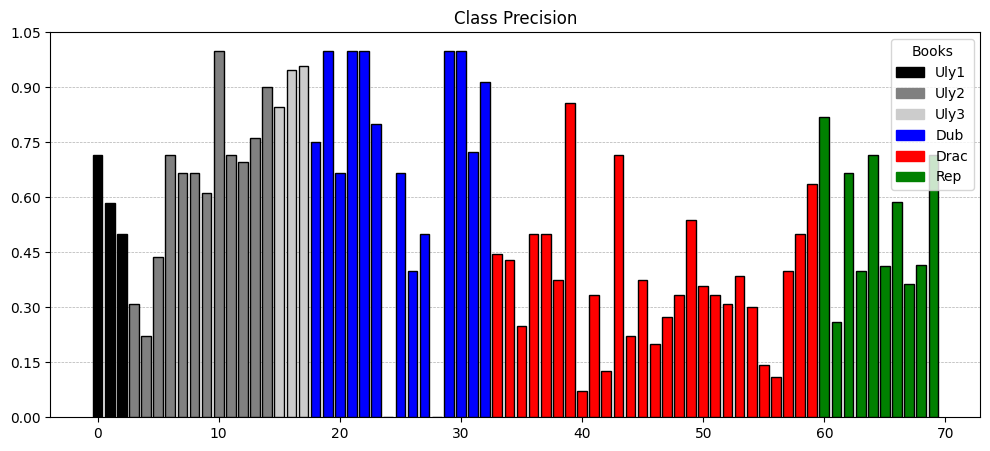

In [ ]:
vals = chapter_precision
cats = [pred2book[i] for i in range(70)]
title = "Class Precision"
bar_chart(vals, cats, title)

#### $\color{green}{Recall:}$

Proportion of reals that are true.

$\frac{TP}{TP + FN}$


In [ ]:
chapter_recall = recall_score(chapter_reals, chapter_preds, average= None, zero_division=np.nan)
chapter_macro_recall = recall_score(chapter_reals, chapter_preds, average="macro", zero_division=np.nan)
chapter_weighted_recall = recall_score(chapter_reals, chapter_preds, average="weighted",zero_division=np.nan)
chapter_micro_recall = recall_score(chapter_reals, chapter_preds, average="micro",zero_division=np.nan)
print('macro recall:', chapter_macro_recall)
print('weighted recall:', chapter_weighted_recall)
print('micro recall:', chapter_micro_recall)

macro recall: 0.5436735692250155
weighted recall: 0.6286307053941909
micro recall: 0.6286307053941909


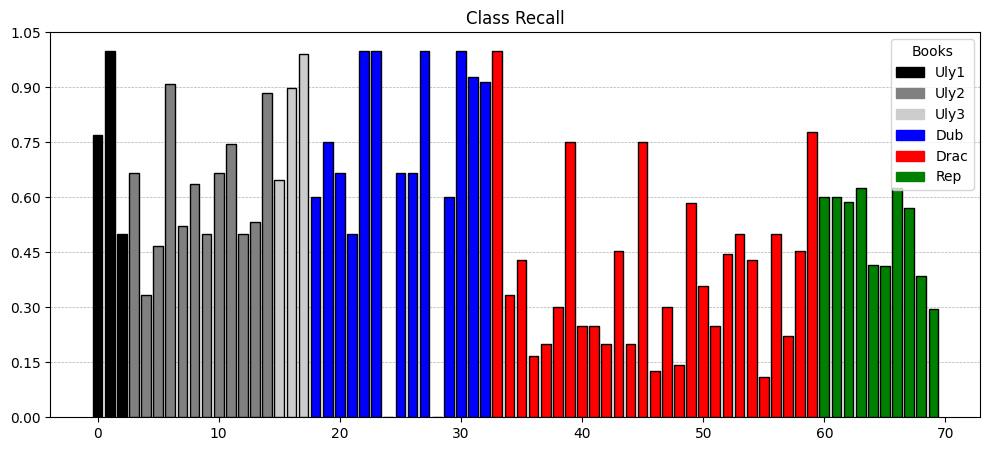

In [ ]:
vals = chapter_recall
cats = [pred2book[i] for i in range(70)]
title = "Class Recall"
bar_chart(vals, cats, title)

#### $\color{green}{F1:}$

Harmonic mean precision and recall

In [ ]:
chapter_f1 = f1_score(chapter_reals, chapter_preds, average= None, zero_division=np.nan)
chapter_macro_f1 = f1_score(chapter_reals, chapter_preds, average="macro", zero_division=np.nan)
chapter_weighted_f1 = f1_score(chapter_reals, chapter_preds, average="weighted",zero_division=np.nan)
chapter_micro_f1 = f1_score(chapter_reals, chapter_preds, average="micro",zero_division=np.nan)
print('macro f1:', chapter_macro_f1)
print('weighted f1:', chapter_weighted_f1)
print('micro f1:', chapter_micro_f1)


macro f1: 0.5220842455548701
weighted f1: 0.6323168425692889
micro f1: 0.6286307053941909


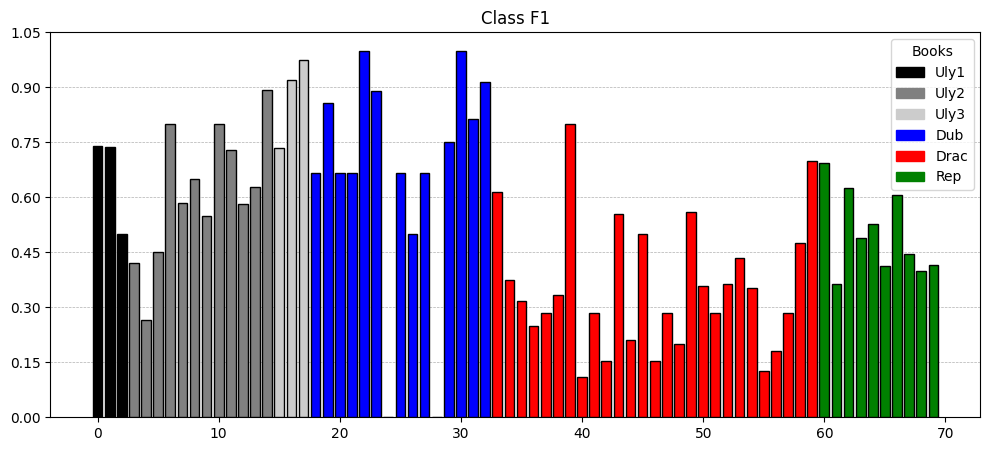

In [ ]:
vals = chapter_f1
cats = [pred2book[i] for i in range(70)]
title = "Class F1"
bar_chart(vals, cats, title)

#### $\color{green}{Confusion:}$

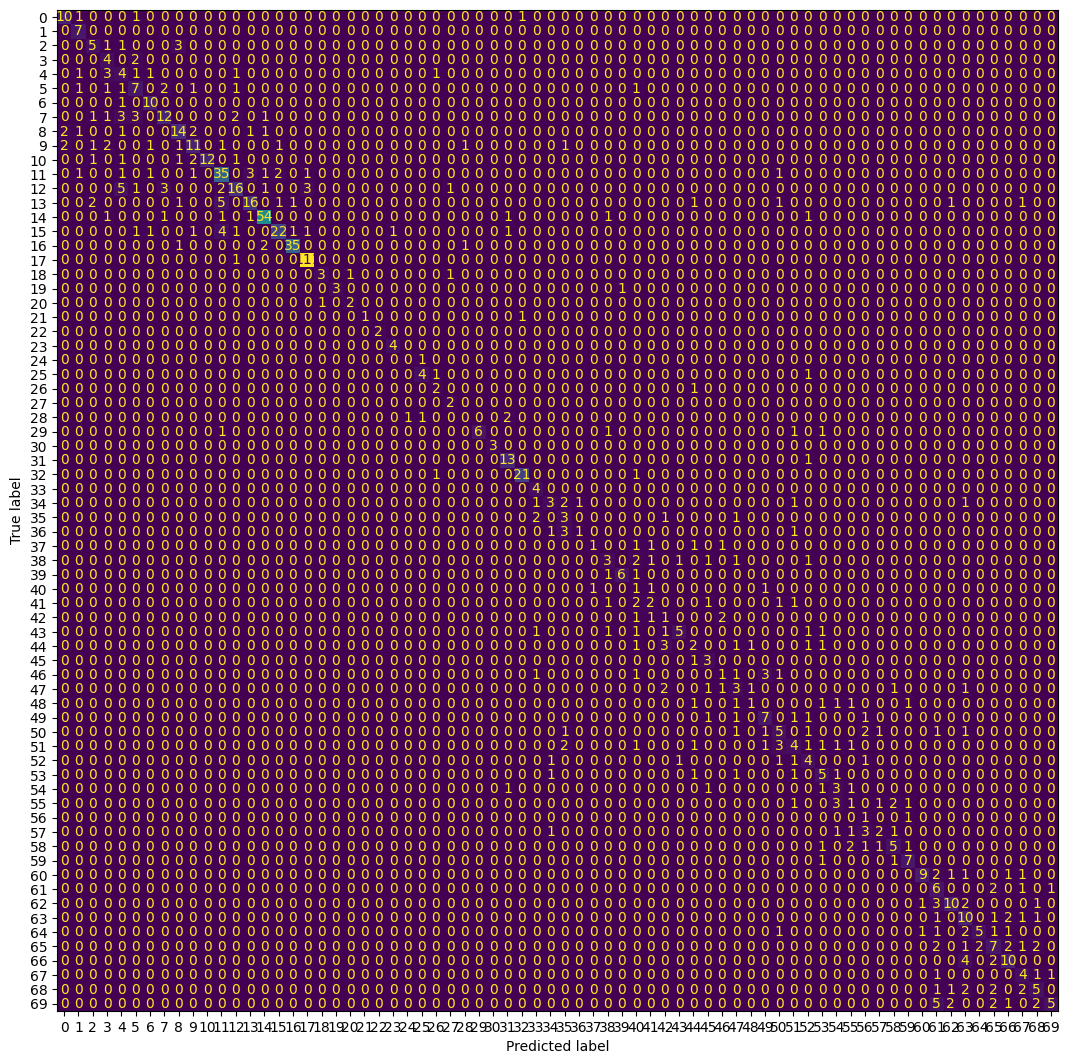

In [ ]:
cm = confusion_matrix(chapter_reals, chapter_preds)
fig, ax = plt.subplots(figsize=(13,13))
cmp = ConfusionMatrixDisplay.from_predictions(chapter_reals, chapter_preds, colorbar=False, ax=ax)


### $\color{red}{Book:}$

6 class problem

In [ ]:
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds',
       'vanilla_moe_e2e_soft_pseudo_book', 'vanilla_moe_e2e_hard_preds',
       'vanilla_moe_e2e_hard_pseudo_book', 'vanilla_moe_e2e_soft_forest_preds',
       'vanilla_moe_e2e_soft_forest_pseudo_book', 'vanilla_moe_hard_pre_preds',
       'vanilla_moe_hard_pre_pseudo_book', 'vanilla_embedding.1',
       'direct_ft_preds', 'direct_ft_pseudo_book', 'ft_embedding',
       'embedding_ft_preds', 'embedding_ft_pseudo_book', 'direct_ft_moe_preds',
       'direct_ft_moe_pseudo_book'],
      dtype='object')

In [ ]:
book_reals = df['book_idx'].to_numpy()
book_preds = df['direct_ft_moe_pseudo_book'].to_numpy()

#### $\color{green}{Accuracy:}$

$\frac{1}{N}\sum_{i=1}^N (y_{true} = y_{pred})$


In [ ]:
book_accuracy = accuracy_score(book_reals, book_preds)
book_accuracy

0.9253112033195021

#### $\color{green}{Precision:}$

Proportion of predictions that are correct

$\frac{TP}{TP + FP}$

* class_precision - stat per class
* macro - average over classes
* weighted - macro weighted by class sizes
* micro - global average (count every true positive and false positive)

In [ ]:
book_precision = precision_score(book_reals, book_preds, average= None, zero_division=np.nan)
book_macro_precision = precision_score(book_reals, book_preds, average="macro", zero_division=np.nan)
book_weighted_precision = precision_score(book_reals, book_preds, average="weighted",zero_division=np.nan)
book_micro_precision = precision_score(book_reals, book_preds, average="micro",zero_division=np.nan)
print('macro precision:', book_macro_precision)
print('weighted precision:', book_weighted_precision)
print('micro precision:', book_micro_precision)

macro precision: 0.8845593617623613
weighted precision: 0.927123048199122
micro precision: 0.9253112033195021


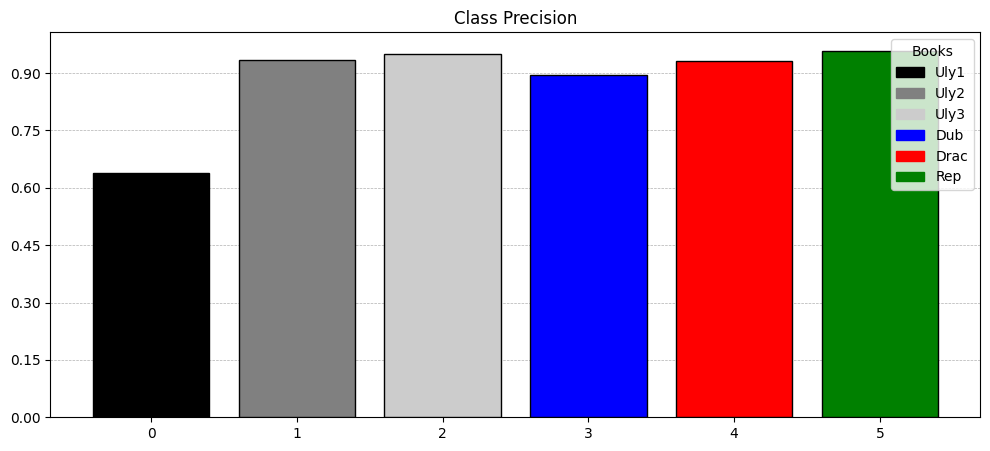

In [ ]:
vals = book_precision
cats = [i for i in range(6)]
title = "Class Precision"
bar_chart(vals, cats, title)

#### $\color{green}{Recall:}$

Proportion of reals that are true.

$\frac{TP}{TP + FN}$


In [ ]:
book_recall = recall_score(book_reals, book_preds, average= None, zero_division=np.nan)
book_macro_recall = recall_score(book_reals, book_preds, average="macro", zero_division=np.nan)
book_weighted_recall = recall_score(book_reals, book_preds, average="weighted",zero_division=np.nan)
book_micro_recall = recall_score(book_reals, book_preds, average="micro",zero_division=np.nan)
print('macro recall:', book_macro_recall)
print('weighted recall:', book_weighted_recall)
print('micro recall:', book_micro_recall)

macro recall: 0.9057355468155519
weighted recall: 0.9253112033195021
micro recall: 0.9253112033195021


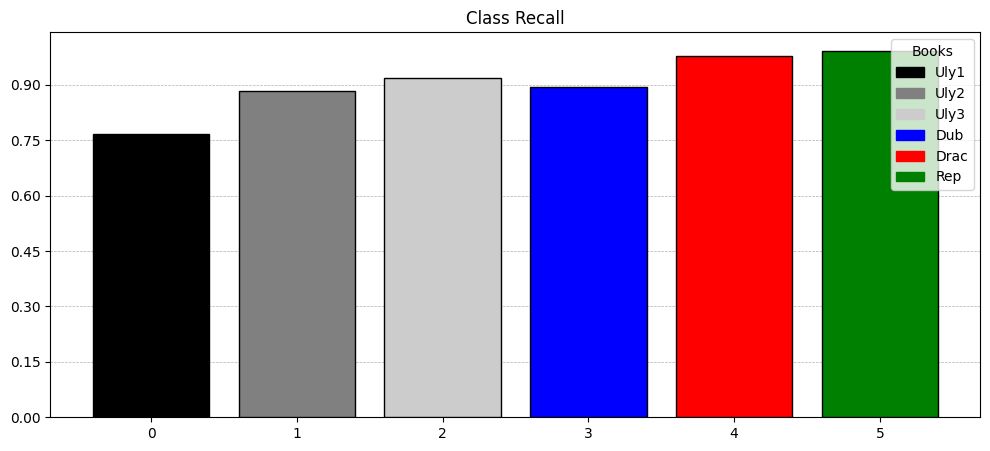

In [ ]:
vals = book_recall
cats = [i for i in range(6)]
title = "Class Recall"
bar_chart(vals, cats, title)

#### $\color{green}{F1:}$

Harmonic mean precision and recall

In [ ]:
book_f1 = f1_score(book_reals, book_preds, average= None, zero_division=np.nan)
book_macro_f1 = f1_score(book_reals, book_preds, average="macro", zero_division=np.nan)
book_weighted_f1 = f1_score(book_reals, book_preds, average="weighted",zero_division=np.nan)
book_micro_f1 = f1_score(book_reals, book_preds, average="micro",zero_division=np.nan)
print('macro f1:', book_macro_f1)
print('weighted f1:', book_weighted_f1)
print('micro f1:', book_micro_f1)

macro f1: 0.8938813209324324
weighted f1: 0.9256037947777507
micro f1: 0.9253112033195021


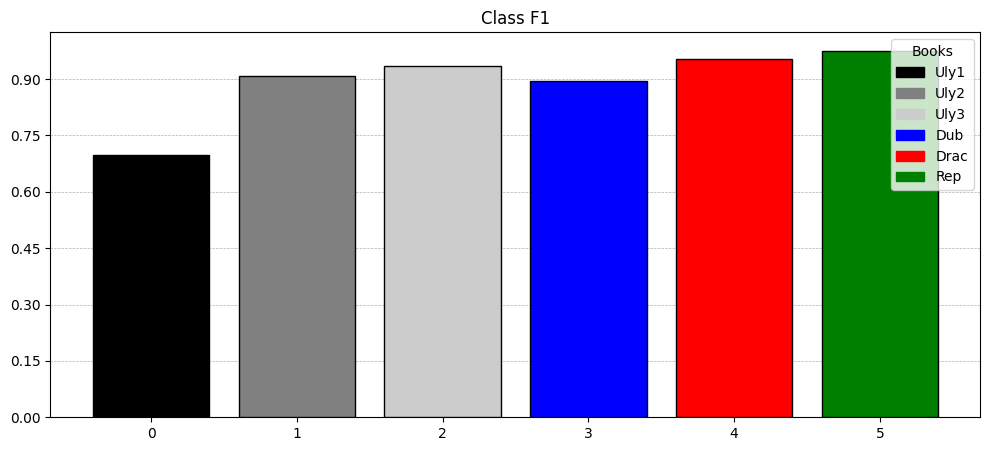

In [ ]:
vals = book_f1
cats = [i for i in range(6)]
title = "Class F1"
bar_chart(vals, cats, title)

#### $\color{green}{Confusion:}$

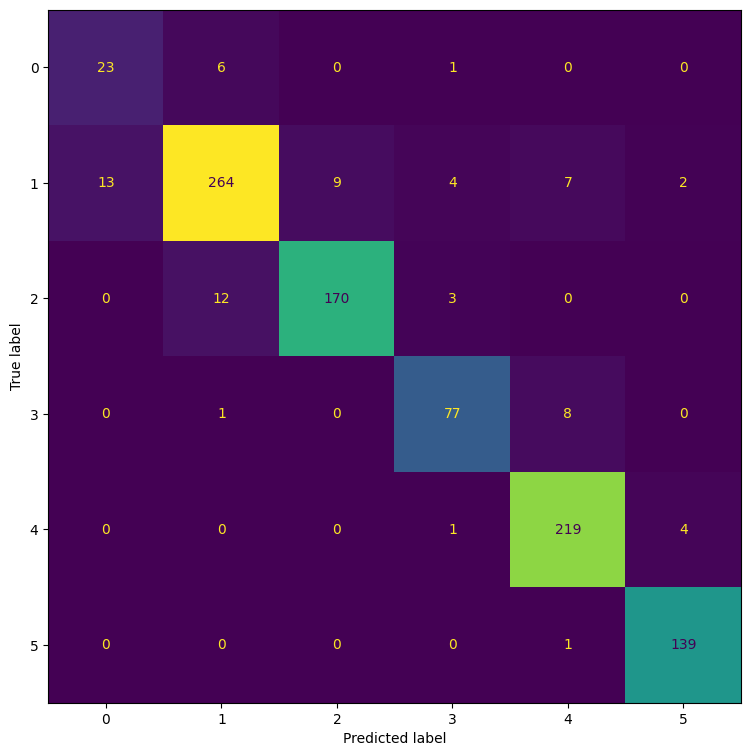

In [ ]:
fig, ax = plt.subplots(figsize=(9,9))
cmp = ConfusionMatrixDisplay.from_predictions(book_reals, book_preds, colorbar=False, ax=ax)

## $\color{blue}{Examination:}$

In [ ]:
# subset incorrect and view
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds',
       'vanilla_moe_e2e_soft_pseudo_book', 'vanilla_moe_e2e_hard_preds',
       'vanilla_moe_e2e_hard_pseudo_book', 'vanilla_moe_e2e_soft_forest_preds',
       'vanilla_moe_e2e_soft_forest_pseudo_book', 'vanilla_moe_hard_pre_preds',
       'vanilla_moe_hard_pre_pseudo_book', 'vanilla_embedding.1',
       'direct_ft_preds', 'direct_ft_pseudo_book', 'ft_embedding',
       'embedding_ft_preds', 'embedding_ft_pseudo_book', 'direct_ft_moe_preds',
       'direct_ft_moe_pseudo_book'],
      dtype='object')

In [ ]:
df_wrong_book = df[df.book_idx != df.direct_ft_moe_pseudo_book]
df_wrong_book = df_wrong_book.reset_index(drop=True)
df_wrong_book.shape

(72, 27)

In [ ]:
for i in range(10):
  ind = int(np.random.choice(df_wrong_book.shape[0],1))
  print('\n ------')
  print(f'Book: {df_wrong_book.loc[ind]["book_idx"]}, Chapter: {df_wrong_book.loc[ind]["chapter_idx"]}')
  print(df_wrong_book.loc[ind]['content'])
  print(f'Pred Book: {df_wrong_book.loc[ind]["direct_ft_moe_pseudo_book"]}, Chapter: {df_wrong_book.loc[ind]["direct_ft_moe_preds"]}')


 ------
Book: 2, Chapter: 15
The driver never said a word, good, bad or indifferent, but merely watched the two figures, as he sat on his lowbacked car, both black, one full, one lean, walk towards the railway bridge, to be married by Father Maher. As they walked they at times stopped and walked again continuing their tête à tête (which, of course,
Pred Book: 3, Chapter: 23

 ------
Book: 3, Chapter: 29
I sent him to the Christian Brothers and I done what I could for him, and there he goes boosing about. I tried to make him someway decent.”   He replaced the cardboard wearily.   “Only I’m an old man now I’d change his tune for him.
Pred Book: 4, Chapter: 51

 ------
Book: 1, Chapter: 12
ty bracegirdle made me do love sticky we two naughty Grace darling she him half
Pred Book: 2, Chapter: 17

 ------
Book: 4, Chapter: 47
Then, turning to the other two, he said with intense gravity:— “I want your permission to do what I think good this night. It is, I know, much to ask; and when you kno

<ipython-input-34-09bf9add66e6>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ind = int(np.random.choice(df_wrong_book.shape[0],1))


In [ ]:
df_wrong_chapter = df[df.chapter_idx != df.direct_ft_moe_preds]
df_wrong_chapter = df_wrong_chapter.reset_index(drop=True)
df_wrong_chapter.shape

(358, 27)

In [ ]:
for i in range(10):
  ind = int(np.random.choice(df_wrong_chapter.shape[0],1))
  print('\n ------')
  print(f'Book: {df_wrong_chapter.loc[ind]["book_idx"]}, Chapter/ {df_wrong_chapter.loc[ind]["chapter_idx"]}')
  print(df_wrong_chapter.loc[ind]['content'])
  print(f'Pred Book: {df_wrong_chapter.loc[ind]["direct_ft_moe_pseudo_book"]}, Chapter: {df_wrong_chapter.loc[ind]["direct_ft_moe_preds"]}')


 ------
Book: 1, Chapter/ 11
I was blue mouldy for the want of that pint. Declare to God I could hear it hit the pit of my stomach with a click.
Pred Book: 1, Chapter: 9

 ------
Book: 1, Chapter/ 9
The old bank of Ireland was over the way till the time of the union and the original jews’ temple was here too before they built their synagogue over in Adelaide road. You were never here before, Jack, were you?   —No, Ned.   —He rode down through Dame walk, the refined accent said, if my memory serves me.
Pred Book: 1, Chapter: 6

 ------
Book: 1, Chapter/ 10
—I quaffed the nectarbowl with him this very day, said Lenehan. In Mooney’s en ville and in Mooney’s sur mer. He had received the rhino for the labour of his muse.   He smiled at bronze’s teabathed lips, at listening lips and eyes:   —The élite of Erin hung upon his lips.
Pred Book: 1, Chapter: 9

 ------
Book: 4, Chapter/ 36
They are peculiar to this part of the world, though allied to the ordinary gipsies all the world over. There 

<ipython-input-39-b05bf94c9b0f>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ind = int(np.random.choice(df_wrong_chapter.shape[0],1))


## $\color{blue}{Examination:}$

In [ ]:
D = {
    'model': ["direct_ft_moe"],
    'params': [110790269],
    'book_accuracy' : [book_accuracy],
    'book_precision': [list(book_precision)],
    'book_macro_precision': [book_macro_precision],
    'book_weighted_precision': [book_weighted_precision],
    'book_recall': [list(book_recall)],
    'book_macro_recall': [book_macro_recall],
    'book_weighted_recall': [book_weighted_recall],
    'book_f1': [list(book_f1)],
    'book_macro_f1':[book_macro_f1],
    'book_weighted_f1': [book_weighted_f1],
        'chapter_accuracy' : [chapter_accuracy],
    'chapter_precision': [list(chapter_precision)],
    'chapter_macro_precision': [chapter_macro_precision],
    'chapter_weighted_precision': [chapter_weighted_precision],
    'chapter_recall': [list(chapter_recall)],
    'chapter_macro_recall': [chapter_macro_recall],
    'chapter_weighted_recall': [chapter_weighted_recall],
    'chapter_f1': [list(chapter_f1)],
    'chapter_macro_f1':[chapter_macro_f1],
    'chapter_weighted_f1': [chapter_weighted_f1],
}

In [ ]:
path = "class/results/"
df_res = pd.read_pickle(path + "master_results.pk")

In [ ]:
df_new = pd.DataFrame(D)

In [ ]:
df_res = pd.concat([df_res, df_new], ignore_index=True)

In [ ]:
df_res

,model,params,book_accuracy,book_precision,book_macro_precision,book_weighted_precision,book_recall,book_macro_recall,book_weighted_recall,book_f1,...,chapter_accuracy,chapter_precision,chapter_macro_precision,chapter_weighted_precision,chapter_recall,chapter_macro_recall,chapter_weighted_recall,chapter_f1,chapter_macro_f1,chapter_weighted_f1
0,vanilla,403070,0.883817,"[0.68, 0.8673469387755102, 0.8691099476439791,...",0.854691,0.882319,"[0.5666666666666667, 0.8528428093645485, 0.897...",0.836373,0.883817,"[0.6181818181818182, 0.8600337268128162, 0.882...",...,0.596473,"[0.6428571428571429, 0.8, 0.5, 0.3, 0.6, 0.714...",0.540711,0.614420,"[0.6923076923076923, 0.5714285714285714, 0.3, ...",0.502501,0.596473,"[0.6666666666666666, 0.6666666666666666, 0.375...",0.492163,0.592659
1,vanilla_moe_e2e_soft,1308029,0.879668,"[0.6, 0.872852233676976, 0.8601036269430051, 0...",0.842570,0.879652,"[0.6, 0.8494983277591973, 0.8972972972972973, ...",0.843171,0.879668,"[0.6, 0.8610169491525423, 0.8783068783068783, ...",...,0.618257,"[0.5882352941176471, 0.6666666666666666, 0.571...",0.560280,0.635325,"[0.7692307692307693, 0.5714285714285714, 0.4, ...",0.541950,0.618257,"[0.6666666666666666, 0.6153846153846154, 0.470...",0.536712,0.617050
2,vanilla_moe_e2e_hard,1308029,0.879668,"[0.6129032258064516, 0.8491803278688524, 0.857...",0.845688,0.880934,"[0.6333333333333333, 0.8662207357859532, 0.875...",0.846277,0.879668,"[0.6229508196721312, 0.8576158940397351, 0.866...",...,0.596473,"[0.6666666666666666, 0.5555555555555556, 0.4, ...",0.528659,0.612263,"[0.6153846153846154, 0.7142857142857143, 0.4, ...",0.526583,0.596473,"[0.64, 0.625, 0.4, 0.6666666666666666, 0.38095...",0.506712,0.592210
3,vanilla_moe_e2e_soft_forest,3061832,0.870332,"[0.6296296296296297, 0.8448844884488449, 0.877...",0.834169,0.869344,"[0.5666666666666667, 0.8561872909698997, 0.848...",0.826442,0.870332,"[0.5964912280701754, 0.8504983388704319, 0.862...",...,0.553942,"[0.6923076923076923, 0.5714285714285714, 0.571...",0.468744,0.565878,"[0.6923076923076923, 0.5714285714285714, 0.4, ...",0.455724,0.553942,"[0.6923076923076923, 0.5714285714285714, 0.470...",0.441130,0.549578
4,vanilla_moe_hard_pre,1308029,0.857884,"[0.5641025641025641, 0.8614864864864865, 0.862...",0.810109,0.862754,"[0.7333333333333333, 0.8528428093645485, 0.848...",0.839826,0.857884,"[0.6376811594202898, 0.8571428571428571, 0.855...",...,0.566390,"[0.6875, 0.6666666666666666, 0.352941176470588...",0.476456,0.590392,"[0.8461538461538461, 0.5714285714285714, 0.6, ...",0.457954,0.566390,"[0.7586206896551724, 0.6153846153846154, 0.444...",0.436410,0.559260
5,direct_ft,109885310,0.902490,"[0.75, 0.896551724137931, 0.8835978835978836, ...",0.879199,0.901942,"[0.7, 0.8695652173913043, 0.9027027027027027, ...",0.876884,0.902490,"[0.7241379310344828, 0.8828522920203735, 0.893...",...,0.613071,"[0.75, 0.7777777777777778, 0.6666666666666666,...",0.540205,0.624456,"[0.9230769230769231, 1.0, 0.2, 0.3333333333333...",0.540334,0.613071,"[0.8275862068965517, 0.875, 0.3076923076923077...",0.522846,0.607524
6,embedding_ft,109885310,0.878631,"[nan, 0.8646616541353384, 0.7213114754098361, ...",0.893996,0.888122,"[0.0, 0.7692307692307693, 0.9513513513513514, ...",0.777679,0.878631,"[0.0, 0.8141592920353983, 0.8205128205128205, ...",...,0.383817,"[nan, nan, nan, nan, nan, 0.2608695652173913, ...",0.328969,0.433432,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.30434782...",0.282326,0.383817,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.3157894736842105, ...",0.225104,0.335905
7,direct_ft_moe,110790269,0.925311,"[0.6388888888888888, 0.9328621908127208, 0.949...",0.884559,0.927123,"[0.7666666666666667, 0.882943143812709, 0.9189...",0.905736,0.925311,"[0.696969696969697, 0.9072164948453608, 0.9340...",...,0.628631,"[0.7142857142857143, 0.5833333333333334, 0.5, ...",0.543312,0.661087,"[0.7692307692307693, 1.0, 0.5, 0.6666666666666...",0.543674,0.628631,"[0.7407407407407407, 0.7368421052631579, 0.5, ...",0.522084,0.632317


In [ ]:
path = "class/results/"
df_res.to_pickle(path + "master_results.pk")